Binary with Spots
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.set_value(qualifier='pitch', component='primary', value=30)

Model without Spots
--------------------------

In [4]:
b.add_dataset('lc', times=phoebe.linspace(0,1,101))

<ParameterSet: 20 parameters | contexts: dataset, compute, constraint>

In [5]:
b.run_compute(irrad_method='none', model='no_spot')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

Adding Spots
---------------------

Let's add a spot to the primary component in our binary, which we have already misaligned by 30 degrees in pitch.

The 'colat' parameter defines the colatitude on the star measured from its North (spin) Pole.  The 'long' parameter measures the longitude of the spot - with longitude = 0 being defined as pointing towards the other star at t0.  See the [spots tutorial](../tutorials/spots.ipynb) for more details.

We'll place this spot at the South Pole, which should be pointing towards the observer because we pitched the north pole away from the observer.

In [6]:
b.add_feature('spot', component='primary', feature='spot01', relteff=0.9, radius=15, colat=180, long=0)

<ParameterSet: 4 parameters | qualifiers: colat, radius, long, relteff>

We'll also add a mesh dataset so that we can see the positioning of the spot with respect to the misaligned component.

In [7]:
b.add_dataset('mesh', compute_times=[0.75], columns=['teffs'])

<ParameterSet: 7 parameters | contexts: dataset, compute, constraint>

In [8]:
b.run_compute(irrad_method='none', model='with_spot')

<ParameterSet: 14 parameters | kinds: mesh, lc>

Location of Spot
------------------------------

Fri, 21 Jun 2019 12:32 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.750000, assuming named color
Fri, 21 Jun 2019 12:32 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.750000, assuming named color


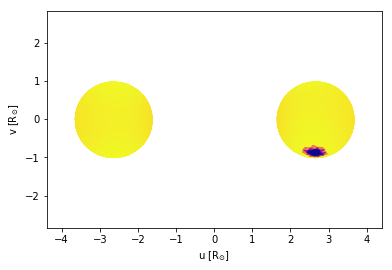

In [9]:
afig, mplfig = b.plot(kind='mesh', fc='teffs', fcmap='plasma', ec='face', show=True)

Comparing Light Curves
------------------------------

Note that the pitch means the polar spot is always facing towards the observer slightly, and so is always visible (unless eclipsed).

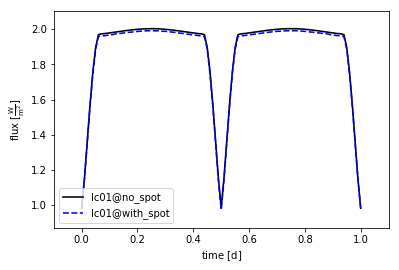

In [10]:
afig, mplfig = b.plot(kind='lc', show=True, legend=True)